<a href="https://colab.research.google.com/github/Chuuya1124/APM1105/blob/main/FA10_Awit%2C_Julia_Theressa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
5           5  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
6           6  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
7           7  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
8           8  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
9           9  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                               Track  \
0                                     Feel Good Inc.   
1                            

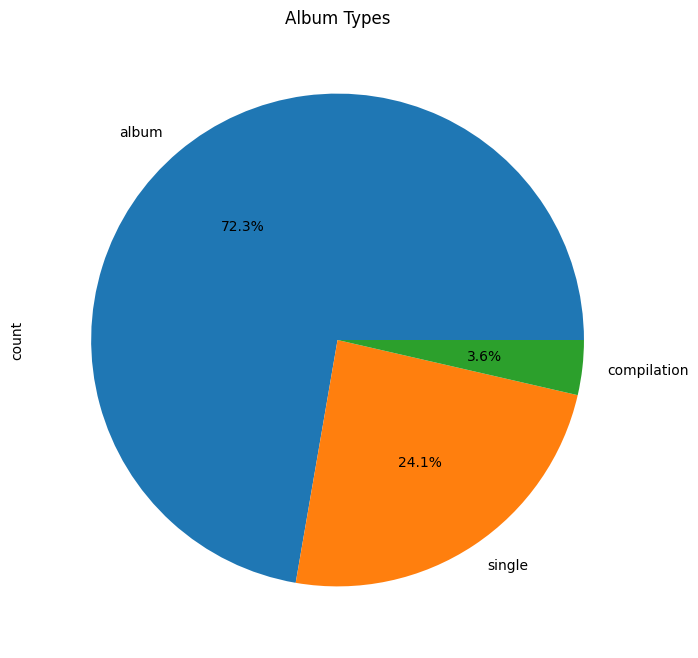

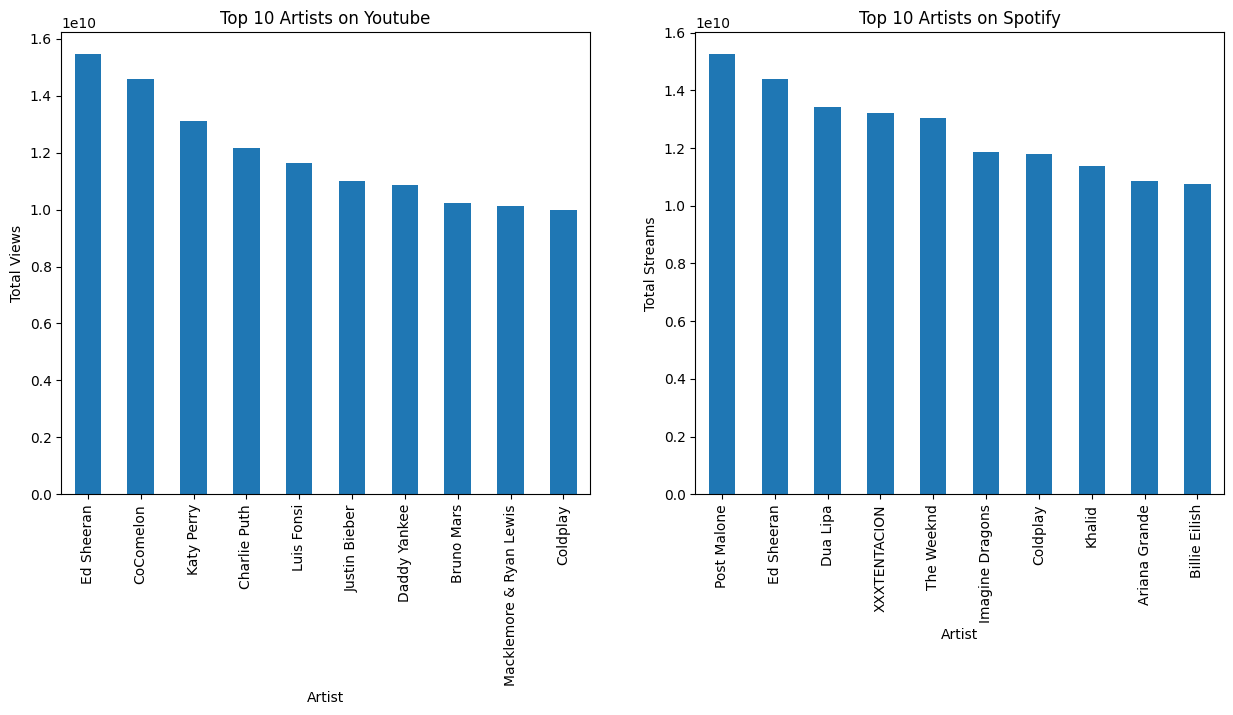

Top 10 Songs with Most Views:
                                    Track         Views
1147                            Despacito  8.079649e+09
365                             Despacito  8.079647e+09
12452                        Shape of You  5.908398e+09
14580  See You Again (feat. Charlie Puth)  5.773798e+09
12469  See You Again (feat. Charlie Puth)  5.773797e+09
20303                   Wheels on the Bus  4.898831e+09
10686      Uptown Funk (feat. Bruno Mars)  4.821016e+09
8937      Gangnam Style (ê°•ë‚¨ìŠ¤íƒ€ì¼)  4.679767e+09
9569                                Sugar  3.817733e+09
13032                                Roar  3.725749e+09

Top 10 Songs with Most Comments:
                                 Track    Comments
14561                         Dynamite  16083138.0
14566                           Butter   9131761.0
14565      Boy With Luv (feat. Halsey)   6535721.0
16030      Boy With Luv (feat. Halsey)   6535719.0
8937   Gangnam Style (ê°•ë‚¨ìŠ¤íƒ€ì¼)   5331537.0
17999         

<ipython-input-3-132414566993>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stream', y='Track', data=top_songs_by_stream, palette='viridis')


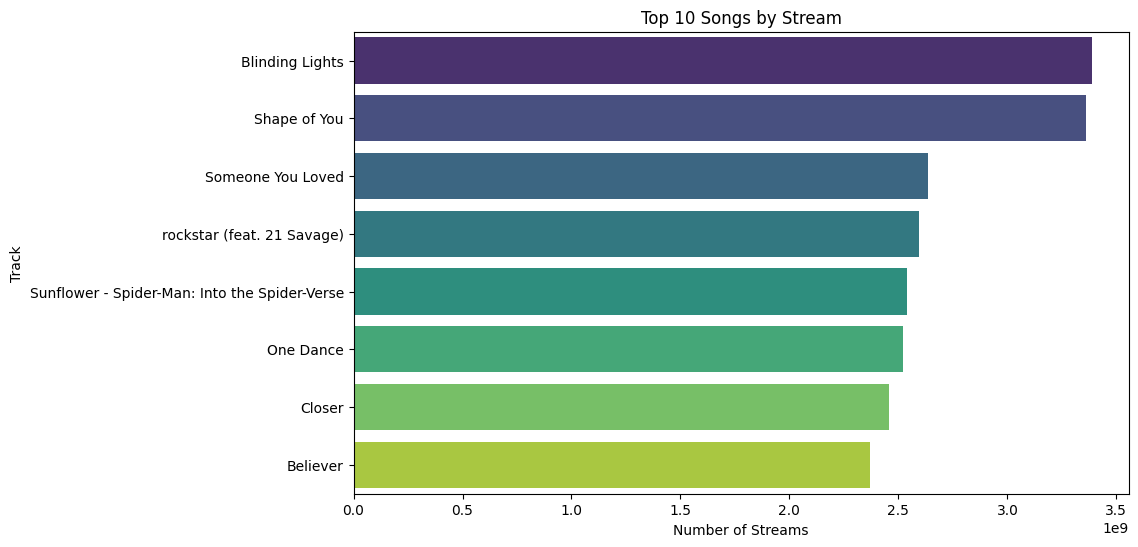

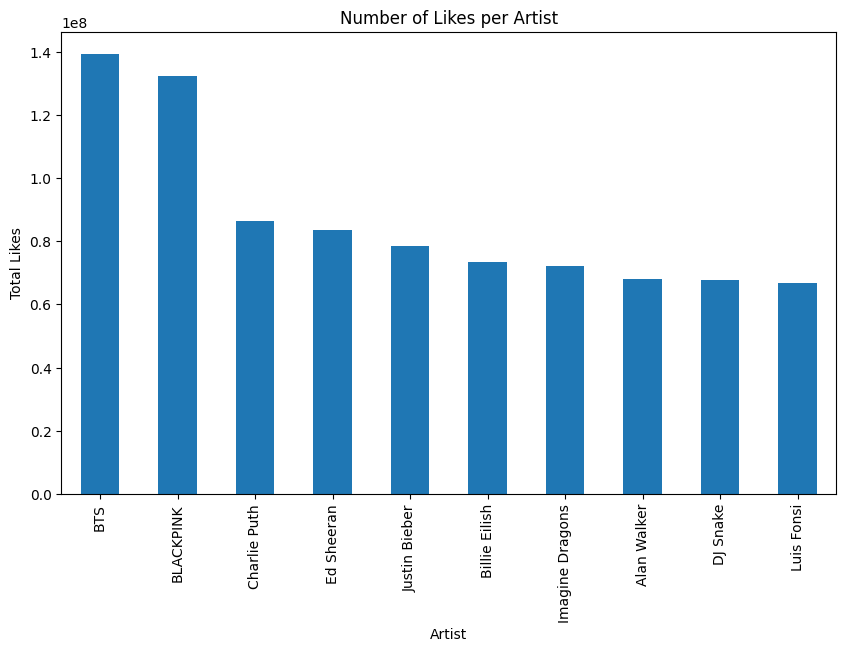

Single Releases by Artists:
                          Views       Likes
Artist                                     
$NOT               4.306836e+07   1097396.0
$uicideboy$        1.020500e+08   1066723.0
(G)I-DLE           1.491479e+09  20487512.0
070 Shake          7.959662e+07   1546726.0
11:11 Music Group  1.262303e+07    178528.0
...                         ...         ...
will.i.am          1.419256e+08   1053838.0
Ãngela Aguilar    1.362718e+07     90201.0
Ã˜neheart          3.458293e+07   1270814.0
Ã‘ejo              5.572154e+08   4026337.0
Ã‘engo Flow        3.045617e+08   3003625.0

[1298 rows x 2 columns]

Compilation Releases by Artists:
                            Views      Likes
Artist                                      
112                    28425671.0   229597.0
2 Chainz              262883082.0  1983586.0
2Pac                  670672702.0  4852133.0
3 Doors Down           40515497.0   177669.0
A Tribe Called Quest   41167375.0   414035.0
...                       

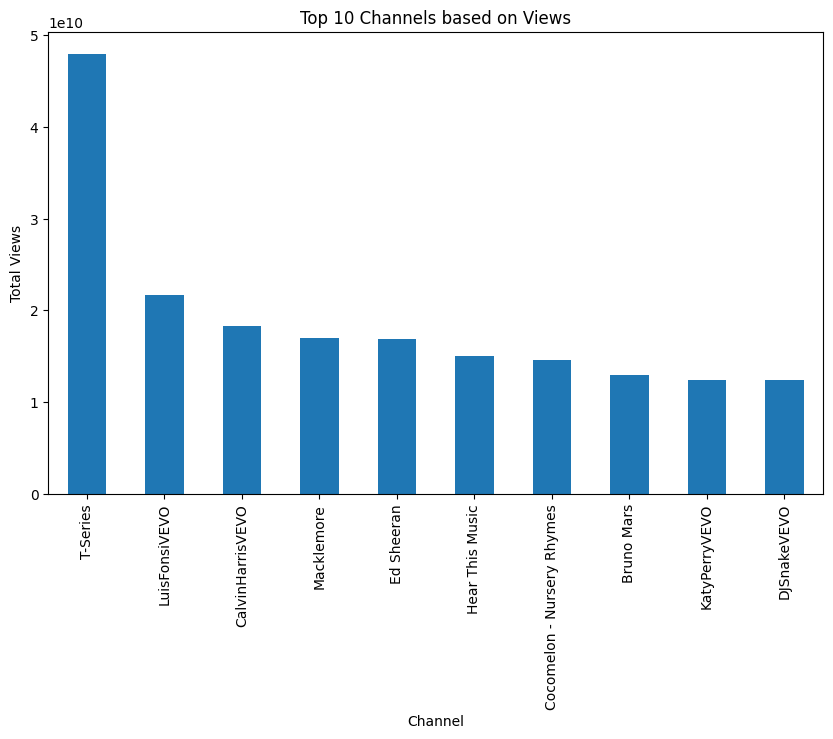

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset
df = pd.read_excel("Spotify_Youtube.xlsx")

#Display the first 10 rows
print(df.head(10))

#Column names
print(df.columns)

#Dataset info
print(df.info())

#Fill NA values and drop others
df['Likes'].fillna(0, inplace=True)
df['Comments'].fillna(0, inplace=True)
df.dropna(inplace=True)

#Describe (Cleaned data)
print(df.describe())

#Album type
print(df['Album_type'].value_counts())

#Pie chart (Album Types)
plt.figure(figsize=(8, 8))
df['Album_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Album Types')
plt.show()

# Analyze (Songs by artist and views-youtube, stream-spotify)
top_artists_youtube = df.groupby('Artist')['Views'].sum().nlargest(10)
top_artists_spotify = df.groupby('Artist')['Stream'].sum().nlargest(10)

#Bar charts for Top 10 Artists on Youtube and Spotify
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
top_artists_youtube.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 Artists on Youtube')
axes[0].set_ylabel('Total Views')
top_artists_spotify.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Artists on Spotify')
axes[1].set_ylabel('Total Streams')
plt.show()

#Top 10 songs by views, comments, and likes
top_views = df.nlargest(10, 'Views')
top_comments = df.nlargest(10, 'Comments')
top_likes = df.nlargest(10, 'Likes')

print("Top 10 Songs with Most Views:")
print(top_views[['Track', 'Views']])
print("\nTop 10 Songs with Most Comments:")
print(top_comments[['Track', 'Comments']])
print("\nTop 10 Songs with Most Likes:")
print(top_likes[['Track', 'Likes']])

#Songs based on Energy, Danceability, and Acousticness
song_analysis = df[['Track', 'Energy', 'Danceability', 'Acousticness']]

# Display table of the analysis
print(song_analysis)

# Display  (Bar chart of the Top 10 Songs by Stream with their Energy, Danceability, and Acousticness)
top_songs_by_stream = df.nlargest(10, 'Stream')
plt.figure(figsize=(10, 6))
sns.barplot(x='Stream', y='Track', data=top_songs_by_stream, palette='viridis')
plt.xlabel('Number of Streams')
plt.title('Top 10 Songs by Stream')
plt.show()

#Top 10 artists on Youtube with more likes
top_artists_likes = df.groupby('Artist')['Likes'].sum().nlargest(10)

#Bar chart
plt.figure(figsize=(10, 6))
top_artists_likes.plot(kind='bar')
plt.title('Number of Likes per Artist')
plt.ylabel('Total Likes')
plt.show()

#Single releases by artists
single_releases = df[df['Album_type'] == 'single'].groupby('Artist')[['Views', 'Likes']].sum()


print("Single Releases by Artists:")
print(single_releases)

#Compilation releases by artists
compilation_releases = df[df['Album_type'] == 'compilation'].groupby('Artist')[['Views', 'Likes']].sum()


print("\nCompilation Releases by Artists:")
print(compilation_releases)

#Top 10 channels based on views
top_channels = df.groupby('Channel')['Views'].sum().nlargest(10)

# Display a bar chart
plt.figure(figsize=(10, 6))
top_channels.plot(kind='bar')
plt.title('Top 10 Channels based on Views')
plt.ylabel('Total Views')
plt.show()
